####  Practice Project - 4

# Rings of Abalone

* You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
# import important libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* Data Description
1. Sex: Sex (M: Male, F: Female, I: Infant)
2. Length: Longest Shell measurement (millimetres - mm)
3. Diameter: Diameter - perpendicular to length (mm)
4. Height: Height - with meat in shell (mm)
5. Whole weight: Weight of whole abalone (grams)
6. Shucked weight: Weight of meat (grams)
7. Viscera weight: Gut weight after bleeding (grams)
8. Shell weight: Shell weight - after being dried (grams)
9. Rings: Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)

In [3]:
# checking infromation of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


* there is no null value. 'sex' column contains object type data. 'rings' are integer. and all other columns are float

In [4]:
# checking shape of df
df.shape

(4177, 9)

#### EDA

In [5]:
# checking stats of df
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The analysis shows that the Ring attribute values ranges from 2 to 29 rings on an abalone specimen. However, the most frequent values of Rings are highly concentrated around the median of the distribution, so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation. I observe that its possible to approximate the distribution of this attribute to a normal curve.

In [6]:
# chceking duplicate rows
df.duplicated().sum()

0

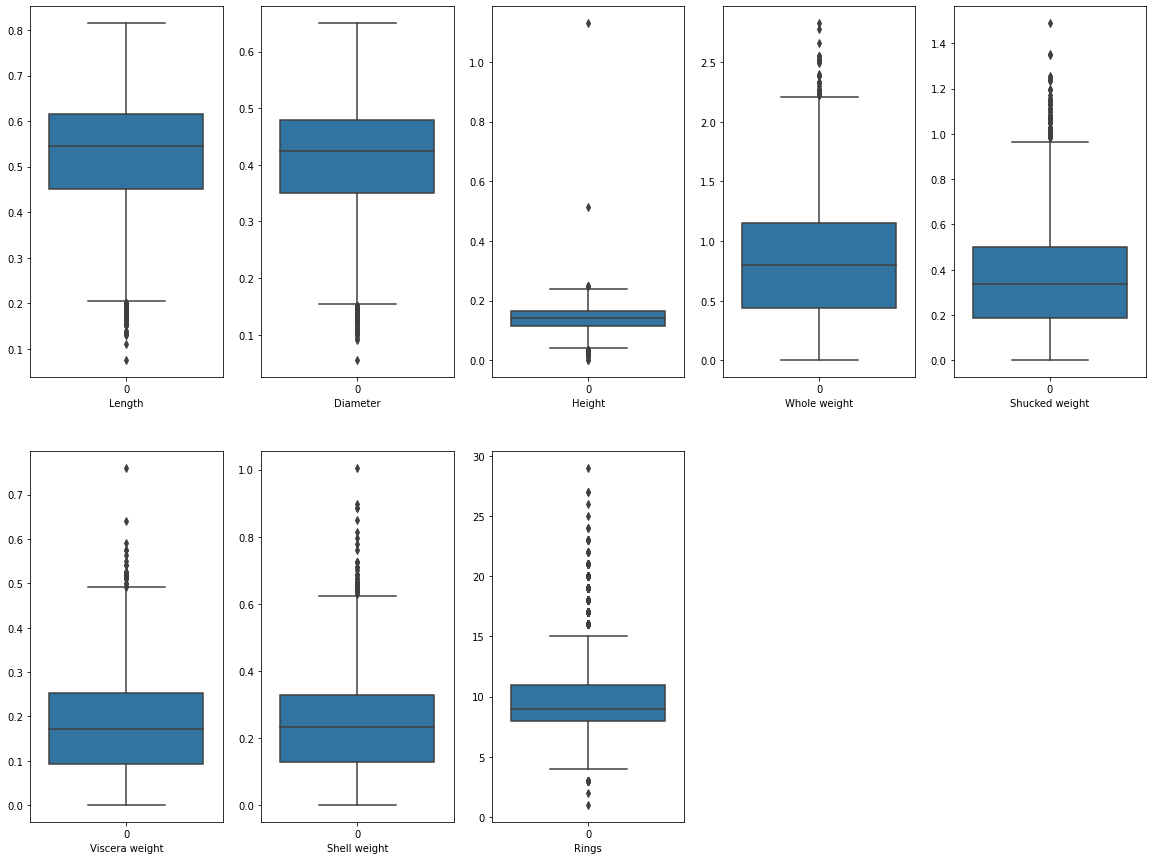

In [7]:
# checking outliers
df1 = df.drop(columns=['Sex'])
plt.figure(figsize=(20,15))
point = 1
for column in df1:
    if point<=8:
        plt.subplot(2,5,point)
        ax = sns.boxplot(data = df1[column])
        plt.xlabel(column,fontsize=10)
    point+=1
plt.show()    

* i observe that all columns contain much outliers. i will remove them in data cleaning phase

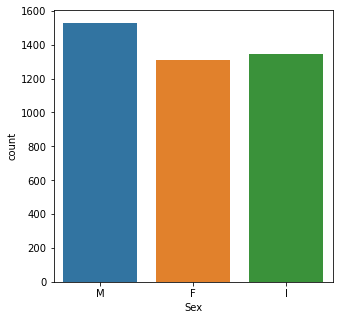

In [8]:
# analysing sex column
plt.figure(figsize=(5,5))
sns.countplot(df.Sex);

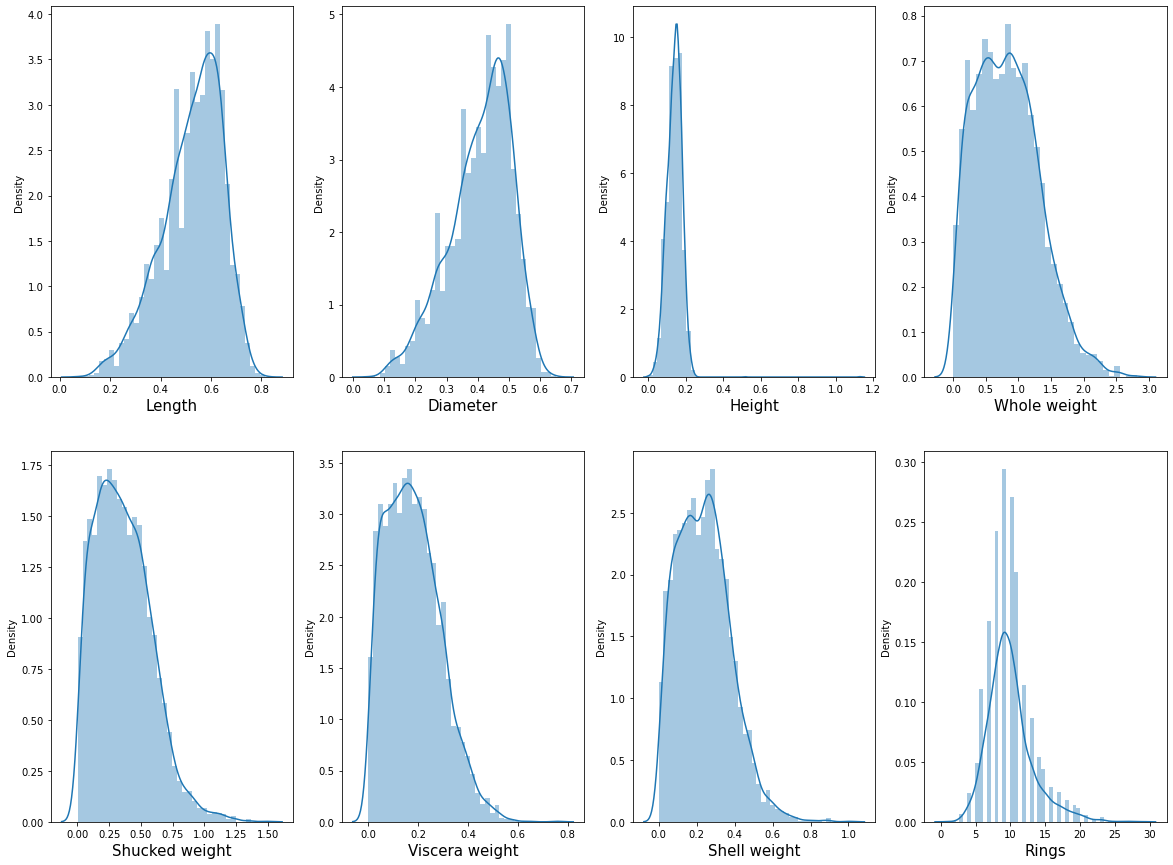

In [9]:
# let's see data distribution for every row
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df1:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show() 

In [10]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

* I can observe that most of the data in columns are skewed

<AxesSubplot:>

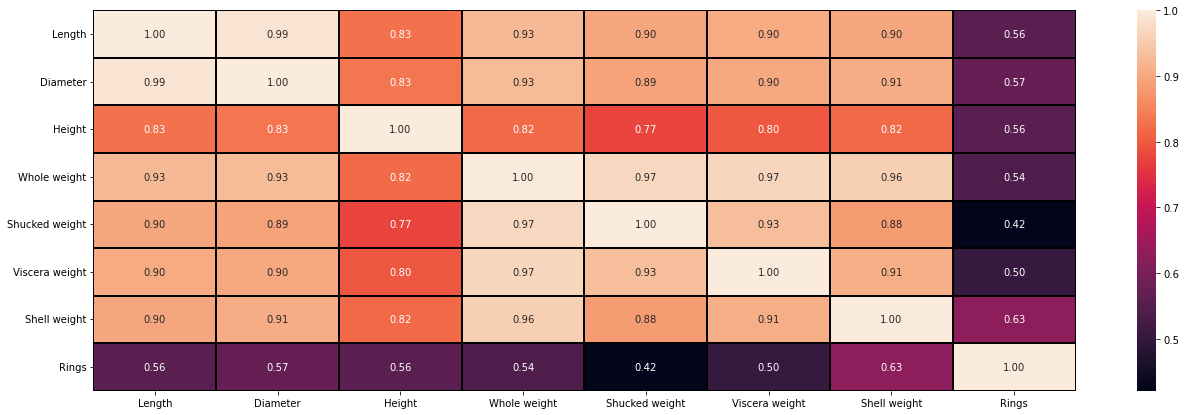

In [11]:
# checcking correlation 
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

* i observe that all columns are correlated to rings and other columns as well but rings number depends on all of these factors so, i will not drop any column as all are important and less columns will affect the accuracy

###  Data Cleaning

In [12]:
# Convert categorical data to numerical data for machine learning model using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
# Outlier detection and removal using z sccore
from scipy import stats
df_outlier= df.copy()
z = np.abs(stats.zscore(df_outlier))
print(z)

           Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0     1.151980  0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.151980  1.448986  1.439929  1.183978      1.230277        1.170910   
2     1.280690  0.050033  0.122130  0.107991      0.309469        0.463500   
3     1.151980  0.699476  0.432149  0.347099      0.637819        0.648238   
4     0.064355  1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...       ...           ...             ...   
4172  1.280690  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  1.151980  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  1.151980  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  1.280690  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.151980  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Rings  
0           0.72

Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [14]:
threshold = 3
print(np.where(z > 3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

The above data shows outlier where z score more than 3. 

In [15]:
# filter the outliers and get the clean data.
df_outlier= df_outlier[(z < 3).all(axis=1)]
df.shape

(4177, 9)

In [16]:
df_outlier.shape

(4027, 9)

So, above code removed around 150 rows from the dataset i.e. outliers have been removed.

In [17]:
df_outlier.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [18]:
# lets remove skewness using yeo-johnson
from sklearn.preprocessing import power_transform

In [19]:
# split data into features and columns
x = df_outlier.drop(columns=['Rings'])
y = df_outlier.Rings

In [20]:
x=power_transform(x,method='yeo-johnson')

* scaling the data

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3, random_state = 42)

### Model Building

In [23]:
# logistic regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = log_reg.predict(x_test)

In [25]:
# checking model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.2696443341604632

In [26]:
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[ 0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  2, 10,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  1, 12,  8,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0, 10, 15, 35,  8,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  1, 14, 53, 22,  9,  3,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  1,  6, 28, 60, 69, 12,  1,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  3, 15, 33, 90, 47,  9,  1,  4,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  3, 12, 14, 76, 55, 23,  0,  8,  0,  0,  1,  0,  0,
         0],
       [ 0,  0,  0,  2,  5,  7, 39, 60, 27,  0,  4,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  2,  1, 28, 26, 21,  0, 12,  0,  0,  1,  0,  0,
         0],
       [ 0,  0,  0,  0,  1,  2, 10, 19, 14,  0, 12,  0,  0,  0,  0,  0,
         0],
       [ 0,  0,  0,  0,  0,  5,  5, 15,  6,  0,  8,  0,  0,  0,  

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.40      0.12      0.19        16
           5       0.34      0.52      0.41        23
           6       0.28      0.21      0.24        70
           7       0.34      0.52      0.41       102
           8       0.39      0.34      0.36       177
           9       0.26      0.45      0.33       202
          10       0.21      0.29      0.24       192
          11       0.23      0.19      0.20       144
          12       0.00      0.00      0.00        91
          13       0.15      0.21      0.18        58
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00        21
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00        17

    accuracy              

* randomforest

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion' :['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [31]:
rf = RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

pred_decision


array([ 8.14, 10.56, 12.76, ..., 10.04,  6.16, 12.79])

### decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
clf.score(x_train,y_train)

1.0

In [37]:
# move to prediction part
y_pred = clf.predict(x_test)

# check the accuracy
accuracy_score(y_test,y_pred)

0.18982630272952852

In [38]:
# we are tuning hyper parameter now by passing different values for both parameters
drid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf': range(2,10),
    'min_samples_split': range(3,10),
    'max_leaf_nodes': range(5,10)
}

In [39]:
grid_search = GridSearchCV(estimator=clf,param_grid=drid_param,cv=5,
                           n_jobs=-1)

In [40]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [41]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [42]:
#  one function and call as many as times to check accuracy score of different model
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==================== Train Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n===================== Test Result =======================")
        
        print(f"Accuracy score :{accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test, pred,digits=2))

In [43]:
# initaiting DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=3,max_depth=10,min_samples_leaf=2,max_leaf_nodes=9)

# train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9,
                       min_samples_leaf=2, min_samples_split=3)

In [44]:
# call the function and pass dataset to check the train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True) # for tarining score

metric_score(clf,x_train,x_test,y_train,y_test, train=False) # for testing score



==================== Train Result =======================
Accuracy score :28.03%

===================== Test Result =======================
Accuracy score :25.68%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.38      0.78      0.51        23
           6       0.00      0.00      0.00        51
           7       0.30      0.68      0.41        80
           8       0.22      0.22      0.22       100
           9       0.24      0.40      0.30       126
          10       0.21      0.21      0.21       121
          11       0.30      0.31      0.30       100
          12       0.00      0.00      0.00        54
          13       0.12      0.12      0.12        41
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00   

In [45]:
# logistic regression has max accuracy so i will go with it

In [46]:
# saving the model

In [47]:
import pickle
filename = 'rings'
pickle.dump(log_reg, open(filename,'wb'))